# Hilbert Transform Visualization

In [19]:
import numpy as np
from scipy.signal import hilbert                #https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch
from matplotlib import animation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams.update({
    'font.size': 8,
    'axes.titlesize': 10,
    'axes.labelsize': 8,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    'legend.fontsize': 7
})

### Parameters and data
Set animation parameters, import data, perform Hilbert Transform.

In [ ]:
filepath = "noisy.npz"
savename = "noisy3D.gif"
display_type = "double"
nframes = 512

In [21]:
if display_type == "single":
    with np.load(filepath) as data:
        x = data["x"][-nframes:]
        t = data["t"][-nframes:]
        args = data["args"]

    params = "ω = " + str(args[0])
    x_hilbert = hilbert(x).imag
    signal = x + 1j * x_hilbert
    amplitude = np.abs(signal)
    phase = np.unwrap(np.angle(signal))

In [22]:
if display_type == "double":
    with np.load(filepath) as data:
        x = data["x"][-nframes:]
        y = data["y"][-nframes:]
        t = data["t"][-nframes:]
        args = data["args"]

    params = "ωx = " + str(args[0]) + ", ωy = " + str(args[1]) + ", εy→x = " + str(args[2]) + ", εx→y = " + str(args[3])

    x_hilbert = hilbert(x).imag
    signal_x = x + 1j * x_hilbert
    amplitude_x = np.abs(signal_x)
    phase_x = np.unwrap(np.angle(signal_x))

    hilbert_y = hilbert(y).imag
    signal_y = y + 1j * hilbert_y
    amplitude_y = np.abs(signal_y)
    phase_y = np.unwrap(np.angle(signal_y))

### Single Phasor View

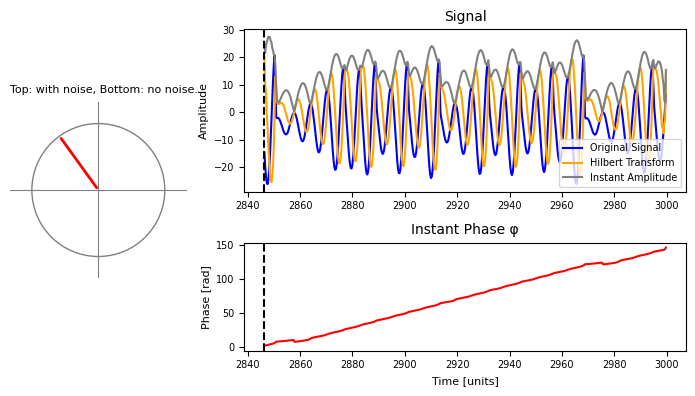

In [24]:
if display_type == "single":  
    fig = plt.figure(figsize=(7, 4))
    gs = fig.add_gridspec(2, 2, width_ratios=[2, 5], height_ratios=[3, 2])

    ax_main = fig.add_subplot(gs[:, 0])
    ax_main.set_aspect('equal', 'box')
    ax_main.axis('off')
    ax_main.set_title(params, fontsize=8, loc="left")

    ax_amp = fig.add_subplot(gs[0, 1])
    ax_amp.plot(t, x, color='blue', label = "Original Signal")
    ax_amp.plot(t, x_hilbert, color='orange', label = "Hilbert Transform")
    ax_amp.plot(t, amplitude, color='gray', label = "Instant Amplitude")
    ax_amp.set_title("Signal")
    ax_amp.set_ylabel("Amplitude")
    ax_amp.legend()
    amp_line = ax_amp.axvline(t[0], color='k', linestyle='--')

    ax_phase = fig.add_subplot(gs[1, 1], sharex=ax_amp)
    ax_phase.plot(t, phase, color='red')
    ax_phase.set_title("Instant Phase φ")
    ax_phase.set_xlabel("Time [units]")
    ax_phase.set_ylabel("Phase [rad]")
    phase_line = ax_phase.axvline(t[0], color='k', linestyle='--')

    fig.tight_layout()

    max_amp = np.max(amplitude)
    pad = 0.2 * max_amp
    ax_main.set_xlim(-max_amp - pad, max_amp + pad)
    ax_main.set_ylim(-max_amp - pad, max_amp + pad)
    ax_main.axhline(0, color='gray', linewidth=0.8)
    ax_main.axvline(0, color='gray', linewidth=0.8)

    circle = Circle((0, 0), amplitude[0], fill=False, color='gray', lw=1)
    arrow = FancyArrowPatch((0, 0), (amplitude[0], 0), mutation_scale=20, color='red', arrowstyle='-', lw=2)
    ax_main.add_patch(circle)
    ax_main.add_patch(arrow)

    def update(i):
        r = amplitude[i]
        theta = phase[i]
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        circle.set_radius(r)
        arrow.set_positions((0, 0), (x, y))
        amp_line.set_xdata([t[i], t[i]])
        phase_line.set_xdata([t[i], t[i]])
        return circle, arrow, amp_line, phase_line

    anim = animation.FuncAnimation(fig, update, frames=nframes, interval=40, blit=True)
    #plt.close(fig)

### Double Phasor View

In [ ]:
if display_type == "double":
    fig = plt.figure(figsize=(8, 4))
    gs = fig.add_gridspec(2, 3, width_ratios=[2, 5, 2])
    
    ax_top = fig.add_subplot(gs[0, 0])
    ax_bottom = fig.add_subplot(gs[1, 0])
    ax_top.set_title(params, fontsize=8, loc="left")

    ax3d_top = fig.add_subplot(gs[0, 2])
    ax3d_bottom = fig.add_subplot(gs[1, 2])

    ax_amp = fig.add_subplot(gs[0, 1])
    ax_amp.plot(t, amplitude_x, color='blue')
    ax_amp.plot(t, amplitude_y, color='red')
    ax_amp.set_title("Instant Amplitude |X|")
    ax_amp.set_ylabel("Amplitude")
    amp_line = ax_amp.axvline(t[0], color='k', linestyle='--')

    ax_phase = fig.add_subplot(gs[1, 1], sharex=ax_amp)
    ax_phase.plot(t, phase_x, color='blue', label = "x")
    ax_phase.plot(t, phase_y, color='red', label = "y")
    ax_phase.set_title("Instant Phase φ")
    ax_phase.set_xlabel("Time [units]")
    ax_phase.set_ylabel("Phase [rad]")
    ax_phase.legend()
    phase_line = ax_phase.axvline(t[0], color='k', linestyle='--')




    fig.tight_layout()

    max_amp = max(np.max(amplitude_x), np.max(amplitude_y))
    pad = 0.2 * max_amp
    for ax in [ax_top, ax_bottom]:
        ax.set_aspect('equal', 'box')
        ax.axis('off')
        ax.set_xlim(-max_amp - pad, max_amp + pad)
        ax.set_ylim(-max_amp - pad, max_amp + pad)
        ax.axhline(0, color='gray', linewidth=0.8)
        ax.axvline(0, color='gray', linewidth=0.8)

    circle_top = Circle((0, 0), amplitude_x[0], fill=False, color='gray', lw=1)
    arrow_top = FancyArrowPatch((0, 0), (amplitude_x[0], 0), mutation_scale=20, color='blue', arrowstyle='-', lw=2)
    ax_top.add_patch(circle_top)
    ax_top.add_patch(arrow_top)

    circle_bottom = Circle((0, 0), amplitude_y[0], fill=False, color='gray', lw=1)
    arrow_bottom = FancyArrowPatch((0, 0), (amplitude_y[0], 0), mutation_scale=20, color='red', arrowstyle='-', lw=2)
    ax_bottom.add_patch(circle_bottom)
    ax_bottom.add_patch(arrow_bottom)

    def update(i):
        r = amplitude_x[i]
        theta = phase_x[i]
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        circle_top.set_radius(r)
        arrow_top.set_positions((0, 0), (x, y))

        r = amplitude_y[i]
        theta = phase_y[i]
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        circle_bottom.set_radius(r)
        arrow_bottom.set_positions((0, 0), (x, y))

        amp_line.set_xdata([t[i], t[i]])
        phase_line.set_xdata([t[i], t[i]])
        return circle_top, arrow_top, circle_bottom, arrow_bottom, amp_line, phase_line

    anim = animation.FuncAnimation(fig, update, frames=nframes, interval=40, blit=True)
    #plt.close(fig)

### Saving and previewing

In [26]:
# Save animation
#anim.save(savename, fps=20, dpi=150)

In [27]:
# Preview in Notebook
#HTML(anim.to_jshtml())